**Importing Libraries**

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

**Data Preprocessing**

In [2]:
#Training Image Preprocessing (Image Data Loading)
train_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


**Validation image Preprocessing**

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


**Building Model**

In [4]:
cnn = tf.keras.Sequential()

In [5]:
#layer -> pooling(max/avg) -> flattening(fully connected)

In [6]:
#Building convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',input_shape=[64,64,3])) #convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))#pooling layer

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu')) #convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))#pooling layer

In [8]:
cnn.add(tf.keras.layers.Flatten())

In [9]:
cnn.add(tf.keras.layers.Dense(units=512, activation='relu')) #converting layers into neurons

In [10]:
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))

In [11]:
cnn.add(tf.keras.layers.Dropout(0.5)) #to avoid overfitting

In [12]:
cnn.add(tf.keras.layers.Dense(units=36, activation='softmax')) #output layer

**Compiling and Training**

In [13]:
cnn.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                   

In [15]:
training_history = cnn.fit(x=train_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 [==============================] - 183s 2s/step - loss: 4.8593 - accuracy: 0.0382 - val_loss: 3.4756 - val_accuracy: 0.0883
Epoch 2/32
98/98 [==============================] - 162s 2s/step - loss: 3.5663 - accuracy: 0.0437 - val_loss: 3.5646 - val_accuracy: 0.0456
Epoch 3/32
98/98 [==============================] - 160s 2s/step - loss: 3.5553 - accuracy: 0.0501 - val_loss: 3.4603 - val_accuracy: 0.1225
Epoch 4/32
98/98 [==============================] - 1134s 12s/step - loss: 3.4765 - accuracy: 0.0722 - val_loss: 3.3487 - val_accuracy: 0.2023
Epoch 5/32
98/98 [==============================] - 57s 546ms/step - loss: 3.3259 - accuracy: 0.0992 - val_loss: 3.0447 - val_accuracy: 0.2821
Epoch 6/32
98/98 [==============================] - 149s 2s/step - loss: 3.0846 - accuracy: 0.1644 - val_loss: 2.5333 - val_accuracy: 0.3647
Epoch 7/32
98/98 [==============================] - 157s 2s/step - loss: 2.8040 - accuracy: 0.2356 - val_loss: 2.1849 - val_accuracy: 0.4274
Epoch 8/3

**Saving Model**

In [16]:
cnn.save('trained_model.h5')

C:\Users\khush\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
training_history.history #Return Dictionary of history

{'loss': [4.859335422515869,
  3.5662851333618164,
  3.555309534072876,
  3.476545810699463,
  3.3259382247924805,
  3.084608316421509,
  2.804013729095459,
  2.4643940925598145,
  2.1187362670898438,
  1.882521152496338,
  1.6363096237182617,
  1.489256501197815,
  1.2705692052841187,
  1.1959459781646729,
  1.071299433708191,
  0.9592155814170837,
  0.9635041356086731,
  0.8394689559936523,
  0.7805220484733582,
  0.6973636150360107,
  0.5903054475784302,
  0.5775567293167114,
  0.5111390948295593,
  0.4608142077922821,
  0.4111054837703705,
  0.37767961621284485,
  0.29945245385169983,
  0.29181334376335144,
  0.34295347332954407,
  0.23604100942611694,
  0.2645255923271179,
  0.2044263780117035],
 'accuracy': [0.03820224851369858,
  0.04365970939397812,
  0.05008025839924812,
  0.07223113626241684,
  0.09919743239879608,
  0.1643659770488739,
  0.23563402891159058,
  0.32327449321746826,
  0.4093098044395447,
  0.48218297958374023,
  0.5479936003684998,
  0.5874799489974976,
  0.65

In [18]:
#Recordig history
import json
with open('training_hist.json','w') as f:
    json.dump(training_history.history,f)

In [19]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [20]:
#Caluclation accuracy of model on validation set
print(training_history.history['val_accuracy'][-1]*100)

95.44159770011902


**Visualization of accuracy**

In [21]:
#training_history.history['accuracy']

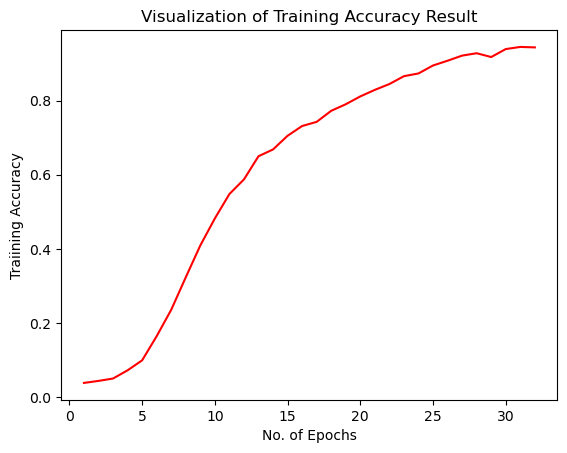

In [23]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()


Text(0.5, 1.0, 'Visualization of Validation Accuracy Result')

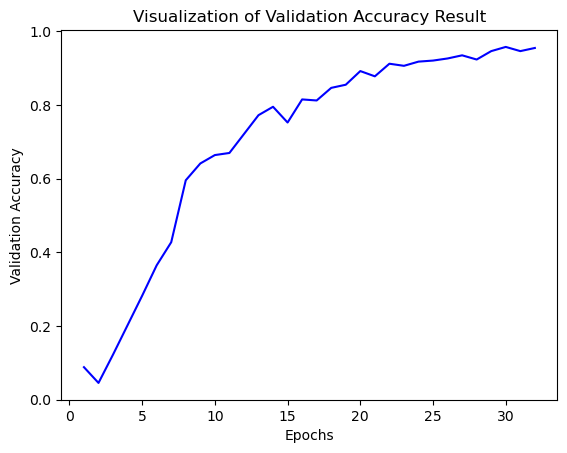

In [24]:
#Validation accuracy
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')

In [25]:
train_loss,train_acuracy = cnn.evaluate(train_set)

98/98 [==============================] - 44s 416ms/step - loss: 0.0806 - accuracy: 0.9807


In [27]:
val_loss,val_accuracy = cnn.evaluate(validation_set)

11/11 [==============================] - 6s 162ms/step - loss: 0.5391 - accuracy: 0.9544


In [28]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [29]:
test_loss,test_acuracy = cnn.evaluate(test_set)

12/12 [==============================] - 7s 169ms/step - loss: 0.5271 - accuracy: 0.9554
